<a href="https://colab.research.google.com/github/harvard-visionlab/psy1410/blob/master/psy1410_facenet_shape_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FaceNet Shape Bias

This notebook let's you test whether FaceNet is more shape-biased than an object-trained network (alexnet).

To do so, you'll use "Neural Style Transfer" to generate images that preserve the "style" (or "texture") of one image and the "structure" (or "shape") of another image.

Then you'll compare the facenet (or alexnet) output for your stylized images to their texture and shape source images. The question is whether the network is biased more towards the original texture image, or the original shape image.

To quantify the bias, we'll compute an index:
```
  # euclidean distance to shape image
  shape_dist = ((stylized_features - shape_features)**2).sum()

  # euclidean distance to texture image
  texture_dist = ((stylized_features - texture_features)**2).sum()

  # bias index
  shape_bias = (texture_dist-shape_dist) / (texture_dist+shape_dist)

```
Negative values mean "texture-biased", positive mean "shape-biased"  
-1 would mean "perfect match to texture image"  
+1 would mean "perfect match to shape image" 

# Getting Started
To follow these instructions it might help to open the "Table of Contents" (click the top icon in the left-hand toolbar).

To get started first run the "Downloads", "Installations", and "Code" sections of the notebook. You only have to run these once when you first connect to a runtime.

Then walk through the "Crop Some Faces" section. Eventually you'll be choosing your own images, dragging them into the "Image" folder, and running this step on your images.

Then try the Style Transfer Demo to see how your style-transferred images look.

At this point you're read to choose your own images. I found that matching for gender and facial hair, but trying to mismatch hair color, skin tone, skin texture, and facial structure gave the most interesting results. 

After you have selected a set of images to serve as your pair, make sure to drag them into the "Images" folder. Remember that if the runtime disconnects, these Images will go away, so make sure to save copies on your own computer.

Once you have your set of images, you'll want to goto the section "Style-transfer a batch of image_pairs" to perform the style transfer on your image pairs.

At last you are ready to compare the embeddings of your stylized images to their texure-source and shape-source, and quantify the amount of texture-bias / shape-bias. For this, go to the section "Compare FaceNet Embeddings for original images vs. stylized versions." This provides a walkthough of how the analysis works.

However, to actually run the analysis, you should goto the section "Experiment: run_shape_bias_test_batch". This shows how to run the experiment with the couple of sample images I downloaded. Edit the list of image pairs to run the code with your image pairs.


# Downloads

Only need to run once after connecting to a runtime.

In [ ]:
!mkdir -p Images
!mkdir -p Models
!wget -c --no-check-certificate https://bethgelab.org/media/uploads/pytorch_models/vgg_conv.pth \
-O /content/Models/vgg_conv.pth

--2021-04-17 14:31:55--  https://bethgelab.org/media/uploads/pytorch_models/vgg_conv.pth
Resolving bethgelab.org (bethgelab.org)... 46.38.232.246
Connecting to bethgelab.org (bethgelab.org)|46.38.232.246|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 160198540 (153M) [text/plain]
Saving to: ‘/content/Models/vgg_conv.pth’

/content/Models/vgg 100%[===================>] 152.78M  5.40MB/s    in 65s     

2021-04-17 14:33:00 (2.35 MB/s) - ‘/content/Models/vgg_conv.pth’ saved [160198540/160198540]



In [ ]:
!mkdir -p Images
!wget -c https://www.dropbox.com/s/jlss88xmcfxexh8/Tuebingen_Neckarfront.jpg \
-O /content/Images/Tuebingen_Neckarfront.jpg
!wget -c https://www.dropbox.com/s/13p4tfxsm42yfv9/vangogh_starry_night.jpg \
-O /content/Images/vangogh_starry_night.jpg

--2021-04-17 14:33:00--  https://www.dropbox.com/s/jlss88xmcfxexh8/Tuebingen_Neckarfront.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jlss88xmcfxexh8/Tuebingen_Neckarfront.jpg [following]
--2021-04-17 14:33:01--  https://www.dropbox.com/s/raw/jlss88xmcfxexh8/Tuebingen_Neckarfront.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3437a2c860b965455a27982877.dl.dropboxusercontent.com/cd/0/inline/BMxBy4fpsVZozZ1G0t9VOHMflbDXCF5XE1LjCLxByK0o7TEsr63M0DtdF6dKc8WNsv6uuRB_1MzhfgI6yokRF88CshNXKJgnRcbbpLl15__-80ws8PQ6Ep9wtc9Ftvghxm-grGk8eKpyjjHTgWmlNbsJ/file# [following]
--2021-04-17 14:33:01--  https://uc3437a2c860b965455a27982877.dl.dropboxusercontent.com/cd/0/inline/BMxBy4fpsVZozZ1G0t9VOHMflbDXCF5XE1LjCLxByK0o7TEsr63

In [ ]:
!wget -c https://s3.amazonaws.com/fast-ai-imageclas/imagenette-320.tgz
!tar -xf imagenette-320.tgz
!rm imagenette-320.tgz

--2021-04-17 14:33:02--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.83.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.83.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341289752 (325M) [application/x-tar]
Saving to: ‘imagenette-320.tgz’

imagenette-320.tgz  100%[===================>] 325.48M  46.4MB/s    in 7.5s    

2021-04-17 14:33:10 (43.2 MB/s) - ‘imagenette-320.tgz’ saved [341289752/341289752]



In [ ]:
!wget -c https://www.dropbox.com/s/s454vu4kpyrhs7s/jennifer-aniston-9185599-1-402.jpg -O ./Images/aniston1.jpg
!wget -c https://www.dropbox.com/s/01z6rmakatd18uw/Brad_Pitt_2019_by_Glenn_Francis.jpg -O ./Images/pitt1.jpg
!wget -c https://www.dropbox.com/s/ocg8cbajx36m6xm/pitt2.jpg -O ./Images/pitt2.jpg
!wget -c https://www.dropbox.com/s/84vqnj017plp904/DavidSchwimmer.jpg -O ./Images/DavidSchwimmer.jpg
!wget -c https://www.dropbox.com/s/4axkgnrpldkoftx/Courteney-Cox.jpg -O ./Images/CourteneyCox.jpg

--2021-04-17 14:33:14--  https://www.dropbox.com/s/s454vu4kpyrhs7s/jennifer-aniston-9185599-1-402.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s454vu4kpyrhs7s/jennifer-aniston-9185599-1-402.jpg [following]
--2021-04-17 14:33:15--  https://www.dropbox.com/s/raw/s454vu4kpyrhs7s/jennifer-aniston-9185599-1-402.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9857429a0b199795f60e319750.dl.dropboxusercontent.com/cd/0/inline/BMyU9bPrcET3rG1MAGfYg18UNennP5UAAGTqxOu9UcoCwT4HVQyRVTHGd8_YCYIRVu4m0RxWTPgwQQu5l8rqVe6GEezAOQHt5oyMrxQPNbPB4wMxdpG0EZAf6Cic0BCse0BSKteN4rJn__Dpi3_O6plO/file# [following]
--2021-04-17 14:33:15--  https://uc9857429a0b199795f60e319750.dl.dropboxusercontent.com/cd/0/inline/BMyU9bPrcET3rG1MAGfYg18U

# Installations

Only need to run once after connecting to a runtime.

In [ ]:
!pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 7.7MB/s 


# Code

## face cropping

In [ ]:
import numpy as np
from PIL import Image 
from facenet_pytorch import MTCNN
from pathlib import Path
from torchvision import transforms 

def crop_face(filename, margin=0, image_size=512):
  img = Image.open(filename)
  
  #s = min(img.size)
  #crop = transforms.CenterCrop(s)
  #img = crop(img)
  
  # create a face detection pipeline using MTCNN:
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  mtcnn = MTCNN(
      image_size=image_size, margin=margin, min_face_size=20,
      thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=False,
      device=device
  ).to(device)

  
  img_cropped = mtcnn(img).permute(1,2,0)
  img_cropped = Image.fromarray(img_cropped.numpy().astype(np.uint8))
  ext = Path(filename).suffix 
  img_cropped.save(filename.replace(ext, f"_cropped{ext}"))

  return img_cropped

## style transfer

In [ ]:
%pylab inline
import time
import os 
image_dir = os.getcwd() + '/Images/'
model_dir = os.getcwd() + '/Models/'

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import torchvision
from torchvision import transforms

from PIL import Image
from collections import OrderedDict

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#vgg definition that conveniently let's you grab the outputs from any layer
class VGG(nn.Module):
    def __init__(self, pool='max'):
        super(VGG, self).__init__()
        #vgg modules
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        if pool == 'max':
            self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        elif pool == 'avg':
            self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool3 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool4 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool5 = nn.AvgPool2d(kernel_size=2, stride=2)
            
    def forward(self, x, out_keys):
        out = {}
        out['r11'] = F.relu(self.conv1_1(x))
        out['r12'] = F.relu(self.conv1_2(out['r11']))
        out['p1'] = self.pool1(out['r12'])
        out['r21'] = F.relu(self.conv2_1(out['p1']))
        out['r22'] = F.relu(self.conv2_2(out['r21']))
        out['p2'] = self.pool2(out['r22'])
        out['r31'] = F.relu(self.conv3_1(out['p2']))
        out['r32'] = F.relu(self.conv3_2(out['r31']))
        out['r33'] = F.relu(self.conv3_3(out['r32']))
        out['r34'] = F.relu(self.conv3_4(out['r33']))
        out['p3'] = self.pool3(out['r34'])
        out['r41'] = F.relu(self.conv4_1(out['p3']))
        out['r42'] = F.relu(self.conv4_2(out['r41']))
        out['r43'] = F.relu(self.conv4_3(out['r42']))
        out['r44'] = F.relu(self.conv4_4(out['r43']))
        out['p4'] = self.pool4(out['r44'])
        out['r51'] = F.relu(self.conv5_1(out['p4']))
        out['r52'] = F.relu(self.conv5_2(out['r51']))
        out['r53'] = F.relu(self.conv5_3(out['r52']))
        out['r54'] = F.relu(self.conv5_4(out['r53']))
        out['p5'] = self.pool5(out['r54'])
        return [out[key] for key in out_keys]

In [ ]:
# gram matrix and loss
class GramMatrix(nn.Module):
    def forward(self, input):
        b,c,h,w = input.size()
        F = input.view(b, c, h*w)
        G = torch.bmm(F, F.transpose(1,2)) 
        G.div_(h*w)
        return G

class GramMSELoss(nn.Module):
    def forward(self, input, target):
        out = nn.MSELoss()(GramMatrix()(input), target)
        return(out)

In [ ]:
# pre and post processing for images
img_size = 512 
prep = transforms.Compose([transforms.Resize(img_size),
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to BGR
                           transforms.Normalize(mean=[0.40760392, 0.45795686, 0.48501961], #subtract imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x.mul_(255)),
                          ])
postpa = transforms.Compose([transforms.Lambda(lambda x: x.mul_(1./255)),
                           transforms.Normalize(mean=[-0.40760392, -0.45795686, -0.48501961], #add imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to RGB
                           ])
postpb = transforms.Compose([transforms.ToPILImage()])
def postp(tensor): # to clip results in the range [0,1]
    t = postpa(tensor)
    t[t>1] = 1    
    t[t<0] = 0
    img = postpb(t)
    return img

In [ ]:
#get network
vgg = VGG()
vgg.load_state_dict(torch.load(model_dir + 'vgg_conv.pth'))
for param in vgg.parameters():
    param.requires_grad = False
if torch.cuda.is_available():
    vgg.cuda()

In [ ]:
def show_images(imgs):
  if show_images:
    for img in imgs:
      imshow(img); show()

def run_style_transfer(image1, image2, display_images=True):
  imgs = [Image.open(image1), Image.open(image2)]
  
  if display_images: show_images(imgs)

  style_image, content_image, opt_img = prepare_images(imgs, show_images=show_images)
  
  out_img = run_transfer(style_image, content_image, opt_img)

  if display_images:
    imshow(out_img)
    gcf().set_size_inches(10,10)

  return out_img

def run_style_transfer_highres(image1, image2, display_images=True):
  imgs = [Image.open(image1), Image.open(image2)]

  if display_images: show_images(imgs)

  style_image, content_image, opt_img = prepare_hr_images(imgs)
 
  out_img = run_transfer_hr(style_image, content_image, opt_img)

  if display_images:
    imshow(out_img)
    gcf().set_size_inches(10,10)

  return out_img 

def prepare_images(imgs, show_images=True):
  imgs_torch = [prep(img) for img in imgs]
  if torch.cuda.is_available():
      imgs_torch = [Variable(img.unsqueeze(0).cuda()) for img in imgs_torch]
  else:
      imgs_torch = [Variable(img.unsqueeze(0)) for img in imgs_torch]
  style_image, content_image = imgs_torch

  # opt_img = Variable(torch.randn(content_image.size()).type_as(content_image.data), requires_grad=True) #random init
  opt_img = Variable(content_image.data.clone(), requires_grad=True)
  
  return style_image, content_image, opt_img

def run_transfer(style_image, content_image, opt_img, show_images=True):
  #define layers, loss functions, weights and compute optimization targets
  style_layers = ['r11','r21','r31','r41', 'r51'] 
  content_layers = ['r42']
  loss_layers = style_layers + content_layers
  loss_fns = [GramMSELoss()] * len(style_layers) + [nn.MSELoss()] * len(content_layers)
  if torch.cuda.is_available():
      loss_fns = [loss_fn.cuda() for loss_fn in loss_fns]
      
  #these are good weights settings:
  style_weights = [1e3/n**2 for n in [64,128,256,512,512]]
  content_weights = [1e0]
  weights = style_weights + content_weights

  #compute optimization targets
  style_targets = [GramMatrix()(A).detach() for A in vgg(style_image, style_layers)]
  content_targets = [A.detach() for A in vgg(content_image, content_layers)]
  targets = style_targets + content_targets

  #run style transfer
  max_iter = 500
  show_iter = 50
  optimizer = optim.LBFGS([opt_img]);
  n_iter=[0]

  while n_iter[0] <= max_iter:

      def closure():
          optimizer.zero_grad()
          out = vgg(opt_img, loss_layers)
          layer_losses = [weights[a] * loss_fns[a](A, targets[a]) for a,A in enumerate(out)]
          loss = sum(layer_losses)
          loss.backward()
          n_iter[0]+=1
          #print loss
          if n_iter[0]%show_iter == (show_iter-1):
              print('Iteration: %d, loss: %f'%(n_iter[0]+1, loss.item()))
  #             print([loss_layers[li] + ': ' +  str(l.data[0]) for li,l in enumerate(layer_losses)]) #loss of each layer
          return loss
      
      optimizer.step(closure)
      
  #display result
  out_img = postp(opt_img.data[0].cpu().squeeze())  

  return out_img

def prepare_hr_images(imgs, show_images=True):

  #make the image high-resolution as described in 
  #"Controlling Perceptual Factors in Neural Style Transfer", Gatys et al. 
  #(https://arxiv.org/abs/1611.07865)

  #hr preprocessing
  img_size_hr = 800 #works for 8GB GPU, make larger if you have 12GB or more
  prep_hr = transforms.Compose([transforms.Resize(img_size_hr),
                                transforms.ToTensor(),
                                transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to BGR
                                transforms.Normalize(mean=[0.40760392, 0.45795686, 0.48501961], #subtract imagenet mean
                                                     std=[1,1,1]),
                                transforms.Lambda(lambda x: x.mul_(255)),
                            ])
  #prep hr images
  imgs_torch = [prep_hr(img) for img in imgs]
  if torch.cuda.is_available():
      imgs_torch = [Variable(img.unsqueeze(0).cuda()) for img in imgs_torch]
  else:
      imgs_torch = [Variable(img.unsqueeze(0)) for img in imgs_torch]
  style_image, content_image = imgs_torch

  #now initialise with upsampled lowres result
  opt_img = prep_hr(out_img).unsqueeze(0)
  opt_img = Variable(opt_img.type_as(content_image.data), requires_grad=True)

  return style_image, content_image, opt_img

def run_transfer_hr(style_image, content_image, opt_img, 
                    show_images=True):
  
  #define layers, loss functions, weights and compute optimization targets
  style_layers = ['r11','r21','r31','r41', 'r51'] 
  content_layers = ['r42']
  loss_layers = style_layers + content_layers
  loss_fns = [GramMSELoss()] * len(style_layers) + [nn.MSELoss()] * len(content_layers)
  if torch.cuda.is_available():
      loss_fns = [loss_fn.cuda() for loss_fn in loss_fns]
      
  #these are good weights settings:
  style_weights = [1e3/n**2 for n in [64,128,256,512,512]]
  content_weights = [1e0]
  weights = style_weights + content_weights

  #compute optimization targets
  style_targets = [GramMatrix()(A).detach() for A in vgg(style_image, style_layers)]
  content_targets = [A.detach() for A in vgg(content_image, content_layers)]
  targets = style_targets + content_targets

  #run style transfer for high res 
  max_iter_hr = 200
  show_iter = 50  
  optimizer = optim.LBFGS([opt_img]);
  n_iter=[0]
  while n_iter[0] <= max_iter_hr:

      def closure():
          optimizer.zero_grad()
          out = vgg(opt_img, loss_layers)
          layer_losses = [weights[a] * loss_fns[a](A, targets[a]) for a,A in enumerate(out)]
          loss = sum(layer_losses)
          loss.backward()
          n_iter[0]+=1
          #print loss
          if n_iter[0]%show_iter == (show_iter-1):
              print('Iteration: %d, loss: %f'%(n_iter[0]+1, loss.item()))
  #             print([loss_layers[li] + ': ' +  str(l.data[0]) for li,l in enumerate(layer_losses)]) #loss of each layer
          return loss

      optimizer.step(closure)
      
  #display result
  out_img_hr = postp(opt_img.data[0].cpu().squeeze())

  return out_img_hr

  

In [ ]:
import os
from fastprogress.fastprogress import progress_bar
from pathlib import Path 

def run_style_transfer_batch(output_folder, image_pairs):
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)

  for file1,file2 in progress_bar(image_pairs):
    if not os.path.isfile(file1):
      raise ValueError(f'file1, {file1} not found')
    if not os.path.isfile(file2):
      raise ValueError(f'file2, {file2} not found')

    if not Path(file1).stem.endswith("_cropped"):
      crop_face(file1, margin=250)
      file1 = file1.replace(Path(file1).suffix, "_cropped"+Path(file1).suffix)
    
    if not Path(file2).stem.endswith("_cropped"):
      crop_face(file2, margin=250)
      file2 = file2.replace(Path(file1).suffix, "_cropped"+Path(file2).suffix)

    print("==> Performing style_transfer")
    print(f"style image: {file1}")
    print(f"shape image: {file2}")
    image1_image2 = run_style_transfer(file1, file2, display_images=False)
    filename = os.path.join(output_folder, f"{Path(file1).stem}--{Path(file2).stem}.jpg") 
    image1_image2.save(filename)

    print("==> Performing style_transfer")
    print(f"style image: {file2}")
    print(f"shape image: {file1}")
    image2_image1 = run_style_transfer(file2, file1, display_images=False)
    filename = os.path.join(output_folder, f"{Path(file2).stem}--{Path(file1).stem}.jpg") 
    image2_image1.save(filename)

## run style transfer on a batch

In [ ]:
import pandas as pd 
from facenet_pytorch import MTCNN, InceptionResnetV1
from torchvision import models, transforms 
from fastprogress.fastprogress import master_bar, progress_bar 

def compute_shape_bias(style_embed, texture_embed, shape_embed):
  shape_dist = ((style_embed-shape_embed)**2).sum().item()
  shape_sim = cosine_similarity(style_embed,shape_embed).item()
  texture_dist = ((style_embed-texture_embed)**2).sum().item()
  texture_sim = cosine_similarity(style_embed,texture_embed).item()
  shape_bias = (texture_dist-shape_dist) / ((texture_dist+shape_dist))

  return shape_dist,shape_sim,texture_dist,texture_sim,shape_bias

def run_shape_bias_test_batch(stylized_folder, image_pairs, model_name):

  results = pd.DataFrame(columns=['model_name',
                                  'style_image', 'texture_image', 'shape_image', 
                                  'texture_dist', 'texture_sim', 
                                  'shape_dist', 'shape_sim',
                                  'shape_bias'])

  device = 'cuda' if torch.cuda.is_available() else 'cpu'

  # load the model 
  print(f"==>Preparing {model_name}")
  if model_name == 'facenet':
    transform = MTCNN(
        image_size=160, margin=0, min_face_size=20,
        thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
        device=device
    ).to(device)

    model = InceptionResnetV1(pretrained='vggface2').to(device).eval()
    model.classify = False

  elif model_name == 'alexnet':
    transform = transforms.Compose([
      transforms.Resize((224,224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
    ])
    model = models.alexnet(pretrained=True).to(device).eval()
  else:
    raise ValueError(f"Unknown modle_name {model_name}. Should be 'facenet' or 'alexnet'")
    
  mb = master_bar(image_pairs)
  for file1,file2 in mb:
    if not os.path.isfile(file1):
      raise ValueError(f'file1, {file1} not found')
    if not os.path.isfile(file2):
      raise ValueError(f'file2, {file2} not found')

    file1_texture_file2_shape = os.path.join(stylized_folder, 
                                            f"{Path(file1).stem}--{Path(file2).stem}.jpg")
    
    file2_texture_file1_shape = os.path.join(stylized_folder,
                                            f"{Path(file2).stem}--{Path(file1).stem}.jpg")

    files = [file1, file2, file1_texture_file2_shape, file2_texture_file1_shape]
    
    embeddings = []
    for filename in progress_bar(files, parent=mb):
      img = Image.open(filename)
      img = transform(img)
      with torch.no_grad():
        embedding = model(img.unsqueeze(0).to(device)).flatten().cpu()
        embeddings.append(embedding.unsqueeze(0))

    idxs = [(2,0,1), (3,1,0)]
    for styleIdx,textureIdx,shapeIdx in idxs:
      style_image = files[styleIdx]
      texture_image = files[textureIdx]
      shape_image = files[shapeIdx]

      out = compute_shape_bias(embeddings[styleIdx], 
                              embeddings[textureIdx], 
                              embeddings[shapeIdx])
      shape_dist,shape_sim,texture_dist,texture_sim,shape_bias = out

      results = results.append({
          "model_name": model_name,
          "style_image": Path(style_image).name,
          "texture_image": Path(texture_image).name,
          "shape_image": Path(shape_image).name,
          "texture_dist": texture_dist,
          "texture_sim": texture_sim,
          "shape_dist": shape_dist,
          "shape_sim": shape_sim,
          "shape_bias": shape_bias,
      }, ignore_index=True)

  return results

# Crop Some Faces


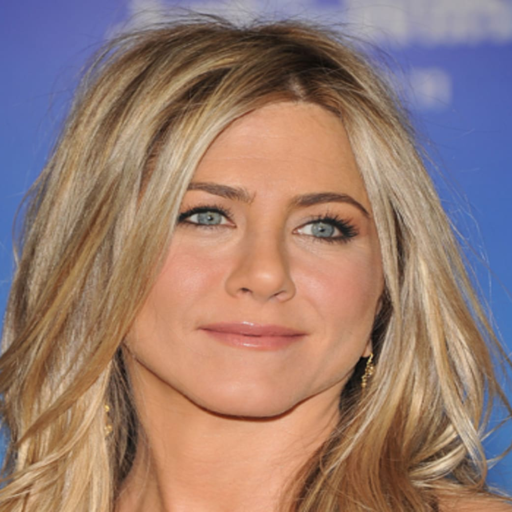

In [ ]:
img = crop_face('Images/aniston1.jpg', margin=250)
img

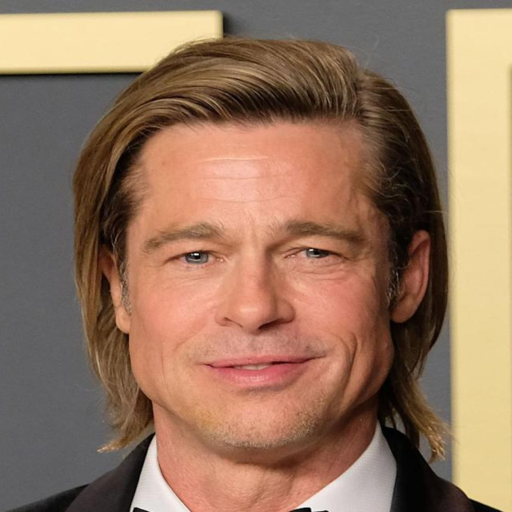

In [ ]:
img = crop_face('Images/pitt2.jpg', margin=250)
img

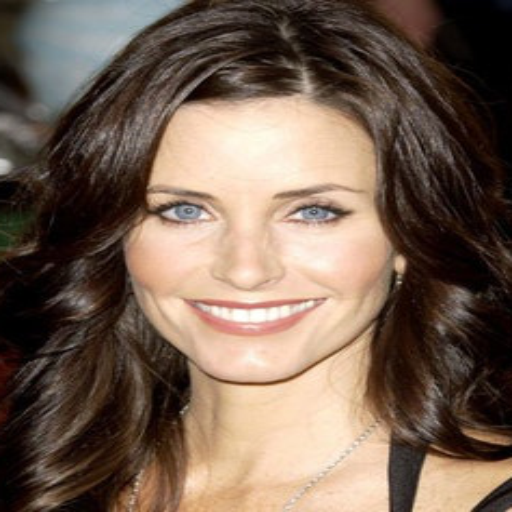

In [ ]:
img = crop_face('Images/CourteneyCox.jpg', margin=250)
img

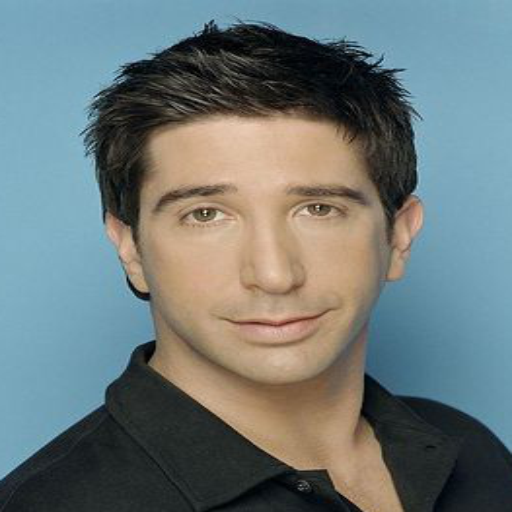

In [ ]:
img = crop_face('Images/DavidSchwimmer.jpg', margin=250)
img

# Style Transfer Demo

Try running this first with the "standard" starry night style transfer demo. Then replace img_names with paths to two face images. Make sure you run the "crop_face" code on the images first (see section above).

In [ ]:
#load images, ordered as [style_image, content_image]
img_names = ['Images/vangogh_starry_night.jpg', 'Images/Tuebingen_Neckarfront.jpg']
img_names = ['Images/aniston1.jpg', 'Images/pitt1.jpg']
img_names = ['Images/pitt2_cropped.jpg', 'Images/aniston1_cropped.jpg']
img_names = ['Images/aniston1_cropped.jpg', 'Images/pitt2_cropped.jpg']
img_names = ['Images/aniston1_cropped.jpg', 'Images/CourteneyCox_cropped.jpg']
# img_names = ['Images/pitt2_cropped.jpg', 'Images/DavidSchwimmer_cropped.jpg']
# img_names = ['Images/DavidSchwimmer_cropped.jpg', 'Images/pitt2_cropped.jpg']

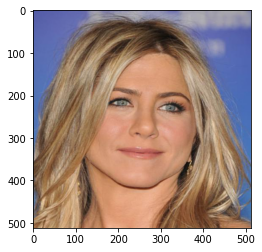

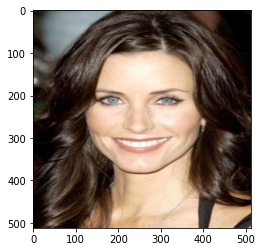

Iteration: 50, loss: 1248469.125000
Iteration: 100, loss: 658024.062500
Iteration: 150, loss: 429618.000000
Iteration: 200, loss: 304411.500000
Iteration: 250, loss: 226202.562500
Iteration: 300, loss: 178575.093750
Iteration: 350, loss: 152848.968750
Iteration: 400, loss: 137199.109375
Iteration: 450, loss: 127065.125000
Iteration: 500, loss: 120569.515625


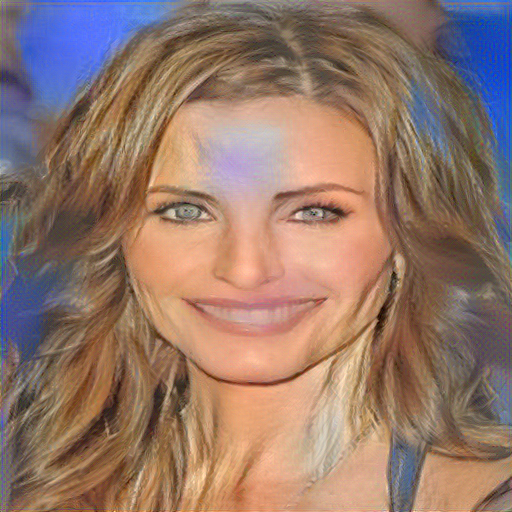

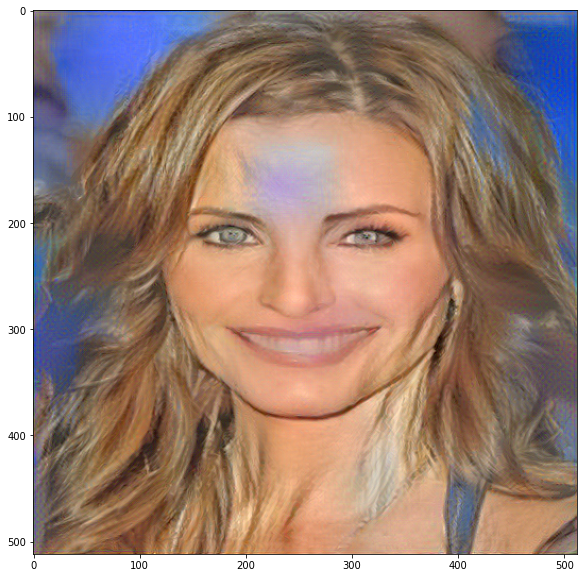

In [ ]:
out_img = run_style_transfer(*img_names, display_images=True)
out_img

In [ ]:
# out_img = run_style_transfer_highres(*img_names, display_images=True)
# out_img

# Style-transfer a batch of image_pairs

This bit of code can be used to process pairs of images. The results will be saved to the folder "stylized_images". But you can change that directory if you want to save them in your google drive. The code will check to see if the transfer image already exists, and skip it of it does (that way you can add images to your list without having to re-generate all of the imges).

If the filename doesn't end in "_cropped", then the code will automatically crop the faces before performing the style transfer.

In [ ]:
output_folder = 'stylized_images'

# The order of the images in a tuple (image1, image2) doesn't matter
# because the code will generate two style-transfer images,  
# one using image1 for texture, image2 for shape (image1-image2.jpg)
# the other using image2 for texture, image1 for shape (image2-image1.jpg)
image_pairs = [
  ('Images/aniston1_cropped.jpg', 'Images/CourteneyCox_cropped.jpg'),
  ('Images/pitt2_cropped.jpg', 'Images/DavidSchwimmer_cropped.jpg'),
]

In [ ]:
run_style_transfer_batch(output_folder, image_pairs)

==> Performing style_transfer
style image: Images/aniston1_cropped.jpg
shape image: Images/CourteneyCox_cropped.jpg
Iteration: 50, loss: 1248469.125000
Iteration: 100, loss: 658024.062500
Iteration: 150, loss: 429618.000000
Iteration: 200, loss: 304411.500000
Iteration: 250, loss: 226202.562500
Iteration: 300, loss: 178575.093750
Iteration: 350, loss: 152848.968750
Iteration: 400, loss: 137199.109375
Iteration: 450, loss: 127065.125000
Iteration: 500, loss: 120569.515625
==> Performing style_transfer
style image: Images/CourteneyCox_cropped.jpg
shape image: Images/aniston1_cropped.jpg
Iteration: 50, loss: 2430340.250000
Iteration: 100, loss: 1402315.250000
Iteration: 150, loss: 935123.062500
Iteration: 200, loss: 663975.437500
Iteration: 250, loss: 486020.625000
Iteration: 300, loss: 373085.875000
Iteration: 350, loss: 306299.375000
Iteration: 400, loss: 261101.984375
Iteration: 450, loss: 231515.312500
Iteration: 500, loss: 210528.859375
==> Performing style_transfer
style image: Imag

# Compare FaceNet Embeddings for original images vs. stylized versions.

The question is whether FaceNet finds stylized images more similar to their texture-source, or shape-source. So for each stylized image we can use euclidian distance to compare the stylized embedding, and compare it with the texture-source and shape-source. We'll score it a "1" if it's more similar to the shape source. The average of these scores indicate how "shape biased" the network is. We can perform the same analysis with AlexNet to see whether FaceNet is more/less shape biased than an object-trained network.



## first a step-by-step walkthrough (FaceNet)

You can always edit the images by hand here (just by changing file1, file2, assuming you have already run the style transfer code on them.

Or, if you have a large batch of images you would like run this on, go to the section on "run_shape_bias_test_batch" down below.

In [ ]:
# first setup the files
file1 = 'Images/CourteneyCox_cropped.jpg'
file2 = 'Images/aniston1_cropped.jpg'
file1_texture_file2_shape = f"stylized_images/{Path(file1).stem}--{Path(file2).stem}.jpg"
file2_texture_file1_shape = f"stylized_images/{Path(file2).stem}--{Path(file1).stem}.jpg"

files = [file1, file2, file1_texture_file2_shape, file2_texture_file1_shape]
files

['Images/CourteneyCox_cropped.jpg',
 'Images/aniston1_cropped.jpg',
 'stylized_images/CourteneyCox_cropped--aniston1_cropped.jpg',
 'stylized_images/aniston1_cropped--CourteneyCox_cropped.jpg']

In [ ]:
# then setup facenet
from facenet_pytorch import MTCNN, InceptionResnetV1

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
).to(device)

# Create an inception resnet (in eval mode):
facenet = InceptionResnetV1(pretrained='vggface2').to(device).eval()
facenet.classify = False

In [ ]:
# then get the embeddings for each image
embeddings = []
for filename in progress_bar(files):
  img = Image.open(filename)
  img_cropped = mtcnn(img)
  with torch.no_grad():
    embedding = facenet(img_cropped.unsqueeze(0).to(device))
    embeddings.append(embedding.cpu())

In [ ]:
from torch.nn.functional import cosine_similarity
# compare the first stylized image to originals
print(files[2])
style_embed = embeddings[2]
texture_embed = embeddings[0]
shape_embed = embeddings[1]

shape_dist = ((style_embed-shape_embed)**2).sum().item()
shape_sim = cosine_similarity(style_embed,shape_embed).item()

texture_dist = ((style_embed-texture_embed)**2).sum().item()
texture_sim = cosine_similarity(style_embed,texture_embed).item()

shape_bias = float(shape_dist < texture_dist)
shape_bias = (texture_dist-shape_dist) / ((texture_dist+shape_dist))
# print("==> Cosine Similarity (higher is more similar)")
# print(f"Shape Similarity: {shape_sim}")
# print(f"Texture Similarity: {shape_sim}")

print("==> Euclidian Distance (lower is more similar)")
print(f"Shape Distance: {shape_dist}")
print(f"Texture Distance: {texture_dist}")
print(f"bias (postive = shape biased): {shape_bias}")


stylized_images/CourteneyCox_cropped--aniston1_cropped.jpg
==> Euclidian Distance (lower is more similar)
Shape Distance: 0.4671330153942108
Texture Distance: 1.9291976690292358
bias (postive = shape biased): 0.6101264166664024


In [ ]:
from torch.nn.functional import cosine_similarity
# compare the first stylized image to originals
print(files[3])
style_embed = embeddings[3]
texture_embed = embeddings[1]
shape_embed = embeddings[0]

shape_dist = ((style_embed-shape_embed)**2).sum().item()
shape_sim = cosine_similarity(style_embed,shape_embed).item()

texture_dist = ((style_embed-texture_embed)**2).sum().item()
texture_sim = cosine_similarity(style_embed,texture_embed).item()

shape_bias = float(shape_dist < texture_dist)
shape_bias = (texture_dist-shape_dist) / ((texture_dist+shape_dist))

# print("==> Cosine Similarity (higher is more similar)")
# print(f"Shape Similarity: {shape_sim}")
# print(f"Texture Similarity: {shape_sim}")

print("==> Euclidian Distance (lower is more similar)")
print(f"Shape Distance: {shape_dist}")
print(f"Texture Distance: {texture_dist}")
print(f"bias (postive = shape biased): {shape_bias}")

stylized_images/aniston1_cropped--CourteneyCox_cropped.jpg
==> Euclidian Distance (lower is more similar)
Shape Distance: 0.5781029462814331
Texture Distance: 1.6592183113098145
bias (postive = shape biased): 0.4832186532712497


# Experiment: run_shape_bias_test_batch

Here you ran run the analysis on a batch of image pairs. This function assumes you have already generated the stylized images.

In [ ]:
stylized_folder = 'stylized_images'
image_pairs = [
  ('Images/aniston1_cropped.jpg', 'Images/CourteneyCox_cropped.jpg'),
  ('Images/pitt2_cropped.jpg', 'Images/DavidSchwimmer_cropped.jpg'),
]
image_pairs

[('Images/aniston1_cropped.jpg', 'Images/CourteneyCox_cropped.jpg'),
 ('Images/pitt2_cropped.jpg', 'Images/DavidSchwimmer_cropped.jpg')]

In [ ]:
facenet_results = run_shape_bias_test_batch(stylized_folder, image_pairs, 'facenet')
facenet_results

==>Preparing facenet


,model_name,style_image,texture_image,shape_image,texture_dist,texture_sim,shape_dist,shape_sim,shape_bias
0,facenet,aniston1_cropped--CourteneyCox_cropped.jpg,aniston1_cropped.jpg,CourteneyCox_cropped.jpg,1.659218,0.170391,0.578103,0.710949,0.483219
1,facenet,CourteneyCox_cropped--aniston1_cropped.jpg,CourteneyCox_cropped.jpg,aniston1_cropped.jpg,1.929198,0.035401,0.467133,0.766433,0.610126
2,facenet,pitt2_cropped--DavidSchwimmer_cropped.jpg,pitt2_cropped.jpg,DavidSchwimmer_cropped.jpg,1.840749,0.079626,0.420019,0.789991,0.628428
3,facenet,DavidSchwimmer_cropped--pitt2_cropped.jpg,DavidSchwimmer_cropped.jpg,pitt2_cropped.jpg,1.810501,0.094750,0.168570,0.915715,0.829647


In [ ]:
alexnet_results = run_shape_bias_test_batch(stylized_folder, image_pairs, 'alexnet')
alexnet_results

==>Preparing alexnet


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


,model_name,style_image,texture_image,shape_image,texture_dist,texture_sim,shape_dist,shape_sim,shape_bias
0,alexnet,aniston1_cropped--CourteneyCox_cropped.jpg,aniston1_cropped.jpg,CourteneyCox_cropped.jpg,1211.451782,0.931921,2029.284302,0.891032,-0.252360
1,alexnet,CourteneyCox_cropped--aniston1_cropped.jpg,CourteneyCox_cropped.jpg,aniston1_cropped.jpg,1984.367432,0.894432,1913.865601,0.891992,0.018086
2,alexnet,pitt2_cropped--DavidSchwimmer_cropped.jpg,pitt2_cropped.jpg,DavidSchwimmer_cropped.jpg,953.500488,0.951587,2038.786987,0.873625,-0.362695
3,alexnet,DavidSchwimmer_cropped--pitt2_cropped.jpg,DavidSchwimmer_cropped.jpg,pitt2_cropped.jpg,935.487244,0.939178,1549.193115,0.864610,-0.246996


In [ ]:
# Negative value mean "texture-biased", positive mean "shape-biased"
# -1 would mean "perfect match to texture image"
# +1 would mean "perfect match to shape image"
print(f"FaceNet Average Bias: {facenet_results.shape_bias.mean()}")
print(f"Alexnet Average Bias: {alexnet_results.shape_bias.mean()}")

FaceNet Average Bias: 0.6378550823000679
Alexnet Average Bias: -0.21099125641184507


# Summary & Conclusions
Breifly write up a summary of what you did, what you found, and what you think it means.

Then share this notebook (you're edited copy) with me to submit your final project.